# PRI Project

## Data Processing

Write something about the project here.

In [2]:
import pandas as pd
import re

Write something about data 1 here

In [3]:
# Read data 1 csv and drop the unnecessary data
jobs_data_1 = pd.read_csv('data/allJobs.csv')
jobs_data_1.drop(columns=['Date-Posted'],inplace=True)
jobs_data_1= jobs_data_1.dropna()
jobs_data_1.rename(columns = {'Company':'company','Job-Title':'title','Job-Type':'work-type','Salary':'salary','Location':'location','Description':'description'}, inplace = True)
jobs_data_1.describe()

,title,company,work-type,salary,location,description
count,2398,2398,2398,2398,2398,2398
unique,2133,1803,4,1543,489,2398
top,Sales Executive,State of Washington,Full-time,£35K–£45K a year,"London, UK",FGSR Grad Studies & Rsrch Admi\n\nCompetition ...
freq,22,23,2224,26,305,1


Write something about data 2 hera

In [4]:
# Read data 2 csv and drop the unnecessary data
jobs_data_2 = pd.read_csv('data/job_postings.csv')
jobs_data_2.drop(columns=['max_salary','min_salary','job_id','expiry','closed_time','applies','currency','compensation_type','original_listed_time','remote_allowed','views','job_posting_url','application_url','application_type','formatted_experience_level','skills_desc','listed_time','posting_domain','sponsored','work_type'],inplace=True)
jobs_data_2.rename(columns = {'med_salary':'salary','formatted_work_type':'work-type'}, inplace = True)
jobs_data_2 = jobs_data_2.dropna()
jobs_data_2.describe()

,company_id,salary
count,9.680000e+02,968.000000
mean,1.000647e+07,41265.693957
std,2.248454e+07,94155.023951
min,1.016000e+03,10.000000
25%,1.164800e+04,18.000000
50%,2.552160e+05,25.840000
75%,4.030721e+06,52000.000000
max,9.855055e+07,998426.000000


Write something about the salary in jobs_data_1 here

In [5]:
def extract_salary_and_pay_period(salary_string):
    salary_string = str(salary_string)
    if 'a year' in salary_string:
        pay_period = 'YEARLY'
        match = re.search(r'\$([\d,.]+[kK]?)-?([\d,.]+[kK]?)?', salary_string)
        if match:
            low_value = match.group(1).replace('.', '').replace(',', '').replace('k', '000').replace('K', '000')
            high_value = match.group(2).replace('.', '').replace(',', '').replace('k', '000').replace('K', '000') if match.group(2) else low_value
            salary = (float(low_value) + float(high_value)) / 2
        else:
            match = re.search(r'\$([\d,.]+[kK]?)', salary_string)
            if match:
                salary = float(match.group(1).replace('.', '').replace(',', '').replace('k', '000').replace('K', '000'))
            else:
                salary = None
    elif 'a month' in salary_string:
        pay_period = 'MONTHLY'
        match = re.findall(r'\$([\d,.]+[kK]?)', salary_string)
        if match:
            salary_range = [(float(m.replace('.', '').replace(',', '').replace('k', '000').replace('K', '000'))) for m in match]
            salary = sum(salary_range) / len(salary_range)
        else:
            salary = None
    elif 'an hour' in salary_string:
        pay_period = 'HOURLY'
        match = re.search(r'\$([\d,.]+[kK]?)', salary_string)
        if match:
            salary = float(match.group(1).replace('.', '').replace(',', '').replace('k', '000').replace('K', '000'))
        else:
            salary = None
    else:
        pay_period = None
        salary = None
    return salary, pay_period

... apply the function

In [6]:
# Split the salary collumn into salary and pay period
jobs_data_1['salary'], jobs_data_1['pay_period'] = zip(*jobs_data_1['salary'].apply(extract_salary_and_pay_period))
# Remove outliers 
jobs_data_1 = pd.concat([jobs_data_1[jobs_data_1['salary'] < 1000000], jobs_data_1[jobs_data_1['salary'].isnull()]])
jobs_data_1.head()

,title,company,work-type,salary,location,description,pay_period
2,Central Graduate Advisor,University of Alberta,Full-time,47210.0,"Edmonton, AB",FGSR Grad Studies & Rsrch Admi\n\nCompetition ...,YEARLY
6,Post-doctoral Fellow,University of Alberta,Full-time,50000.0,"Edmonton, AB",ART East Asian Studies\n\nCompetition No. -\nA...,YEARLY
7,Graduate Research Assistant,University of Calgary,Full-time,20000.0,"Calgary, AB",The Adaptive Bionics Lab at the University of ...,YEARLY
24,Postdoctoral Fellow in Environmental Epidemiology,University of Alberta,Full-time,50000.0,"Edmonton, AB",PH School of Public Health\n\nCompetition No. ...,YEARLY
78,"Advisor, Student Service Centre",University of Alberta,Full-time,51055.0,"Edmonton, AB",RO Student Service Centre\n\nCompetition No. -...,YEARLY


.. add company data

In [7]:
# Create a new dataframe for company data
company_data_1 = jobs_data_1["company"].drop_duplicates().reset_index(drop=True).reset_index()
company_data_1.columns = ['company_id', 'company']
company_data_1['company_id'] = company_data_1['company_id'] + 3700152515

jobs_data_1 = pd.merge(jobs_data_1, company_data_1, on='company', how='left')
jobs_data_1.drop(columns=['company'],inplace=True)
jobs_data_1['work-type'].replace({'Contractor': 'Contract'}, inplace=True)

company_data_2 = pd.read_csv('data/companies.csv')
company_data_2.drop(columns=['description',	'company_size',	'state'	,'country'	,'city',	'zip_code',	'address',	'url'],inplace=True)
company_data_2.rename(columns = {'name':'company'}, inplace = True)

company_data = pd.concat([company_data_1,company_data_2])
company_data

,company_id,company
0,3700152515,University of Alberta
1,3700152516,University of Calgary
2,3700152517,University of Newcastle
3,3700152518,State Government of WA Department of Education
4,3700152519,Queensland Government - Department of Education
...,...,...
6058,3700144594,BYREDO
6059,3700144710,"Pros2Plan, a division of Spinnaker SCA"
6060,3700147810,Ascendo Resources
6061,3700150295,The Crox Group


...merge dataframes

In [8]:
# Merge dataframes
jobs_data = pd.concat([jobs_data_1, jobs_data_2], ignore_index=True)

jobs_data=jobs_data[jobs_data["salary"]!="NaN"]
jobs_data.head()
jobs_data.describe()

,salary,company_id
count,1986.000000,3.342000e+03
mean,67980.982251,2.631314e+09
std,96762.737528,1.674139e+09
min,10.000000,1.016000e+03
25%,26.505000,1.831891e+07
50%,50000.000000,3.700153e+09
75%,90000.000000,3.700154e+09
max,998426.000000,3.700154e+09


... write something about country data

In [9]:
# Read countries csv and drop the unnecessary data
countries_data = pd.read_csv('data/countries.csv')
countries_data = countries_data[['name','alpha-2','region','sub-region']]
countries_data.head()

,name,alpha-2,region,sub-region
0,Afghanistan,AF,Asia,Southern Asia
1,Åland Islands,AX,Europe,Northern Europe
2,Albania,AL,Europe,Southern Europe
3,Algeria,DZ,Africa,Northern Africa
4,American Samoa,AS,Oceania,Polynesia


... extract city and country data

In [10]:
def extract_city_and_country(location_string, country_list):
    splited_location = location_string.split(',')
    first_word = splited_location[0]
    last_word = splited_location[-1][1:]
    country_names = country_list['name'].values
    country_alpha = country_list['alpha-2'].values

    if first_word in country_names:
        region = country_list[country_list['name'] == first_word]['region'].iloc[0]
        return None, first_word, region
    elif first_word in country_alpha:
        country = country_list[country_list['alpha-2'] == first_word]['name'].iloc[0]
        region = country_list[country_list['alpha-2'] == first_word]['region'].iloc[0]
        return None, country, region
    elif last_word in country_names:
        region = country_list[country_list['name'] == last_word]['region'].iloc[0]
        return first_word, last_word, region
    elif last_word in country_alpha:
        country = country_list[country_list['alpha-2'] == last_word]['name'].iloc[0]
        region = country_list[country_list['alpha-2'] == last_word]['region'].iloc[0]
        return first_word, country, region
    elif len(splited_location) > 0:
        return first_word, 'United States of America', 'Americas'
    return None, None, None

... aply function

In [11]:
# Create location table
jobs_location_data = pd.DataFrame(jobs_data['location'], columns=['location'])
jobs_location_data['city'], jobs_location_data['country'], jobs_location_data['region'] = zip(*jobs_location_data['location'].apply(lambda x: extract_city_and_country(x, countries_data)))
jobs_location_data.drop_duplicates(inplace=True)
jobs_location_data.reset_index(drop=True, inplace=True)
jobs_location_data.insert(0, 'location_id', range(1, 1 + len(jobs_location_data)))

jobs_data = pd.merge(jobs_data, jobs_location_data[['location', 'location_id']], on='location', how='left')
jobs_data.drop(columns=['location'], inplace=True)

jobs_location_data.drop(columns=['location'], inplace=True)
jobs_data.head()

,title,work-type,salary,description,pay_period,company_id,location_id
0,Central Graduate Advisor,Full-time,47210.0,FGSR Grad Studies & Rsrch Admi\n\nCompetition ...,YEARLY,3.700153e+09,1
1,Post-doctoral Fellow,Full-time,50000.0,ART East Asian Studies\n\nCompetition No. -\nA...,YEARLY,3.700153e+09,1
2,Graduate Research Assistant,Full-time,20000.0,The Adaptive Bionics Lab at the University of ...,YEARLY,3.700153e+09,2
3,Postdoctoral Fellow in Environmental Epidemiology,Full-time,50000.0,PH School of Public Health\n\nCompetition No. ...,YEARLY,3.700153e+09,1
4,"Advisor, Student Service Centre",Full-time,51055.0,RO Student Service Centre\n\nCompetition No. -...,YEARLY,3.700153e+09,1


... graphic 8K HDR 

Text(0.5, 1.0, 'Job postings by Pay-Period')

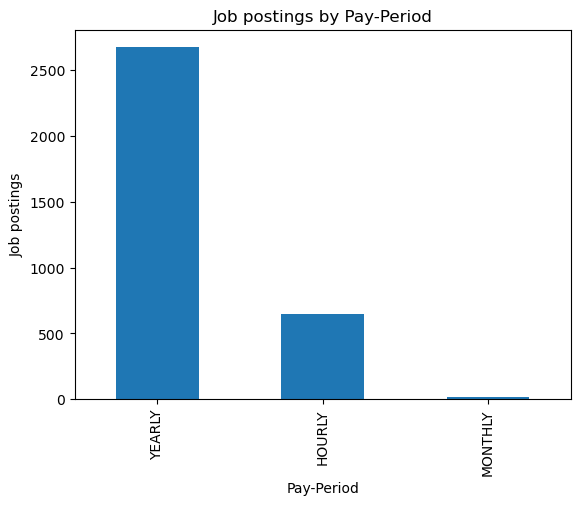

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

jobs_data['pay_period'].value_counts().plot(kind='bar')
plt.xlabel('Pay-Period')
plt.ylabel('Job postings')
plt.title('Job postings by Pay-Period')

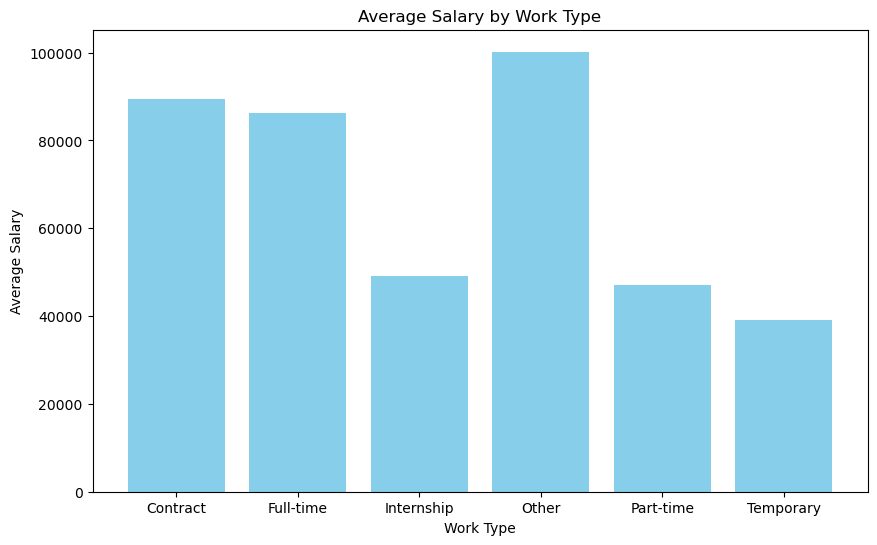

In [13]:
jobs_data_final_copy = jobs_data.copy().reset_index()

for idx ,job in jobs_data_final_copy.iterrows():
    if job["pay_period"] == "MONTHLY":
        jobs_data_final_copy.at[idx ,"salary"] *= 12
    elif job["pay_period"] == "HOURLY":
        jobs_data_final_copy.at[idx ,"salary"] *= 1810

average_salary_by_work_type = jobs_data_final_copy.groupby('work-type')['salary'].mean().reset_index()
plt.figure(figsize=(10 ,6))  
plt.bar(average_salary_by_work_type["work-type"] ,average_salary_by_work_type["salary"] ,color='skyblue')
plt.xlabel('Work Type')
plt.ylabel('Average Salary')
plt.title('Average Salary by Work Type')
plt.show()

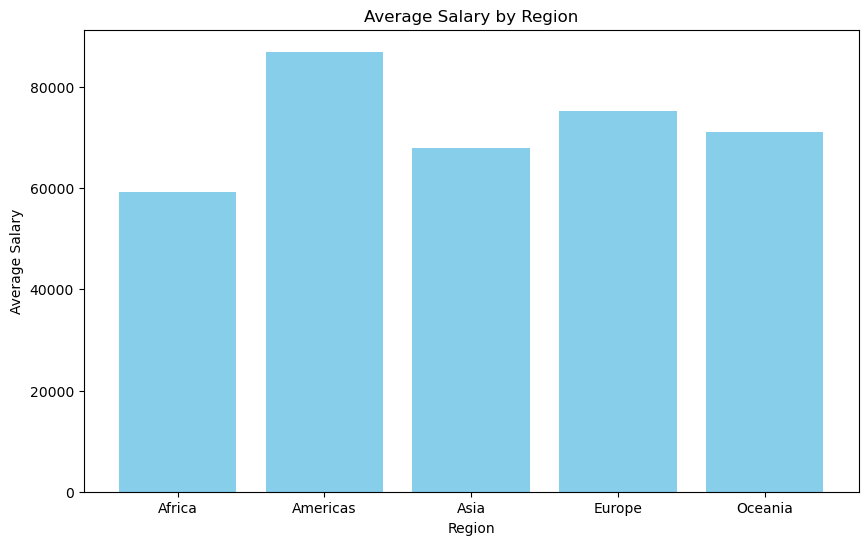

In [14]:
jobs_data_final_copy = pd.merge(jobs_data_final_copy, jobs_location_data, on='location_id', how='left')
average_salary_by_region = jobs_data_final_copy.groupby('region')['salary'].mean().reset_index()
plt.figure(figsize=(10 ,6))
plt.bar(average_salary_by_region["region"] ,average_salary_by_region["salary"] ,color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Salary')
plt.title('Average Salary by Region')
plt.show()

,index,title,work-type,salary,description,pay_period,company_id,location_id,city,country,region
0,0,Central Graduate Advisor,Full-time,47210.0,FGSR Grad Studies & Rsrch Admi\n\nCompetition ...,YEARLY,3.700153e+09,1,Edmonton,United States of America,Americas
1,1,Post-doctoral Fellow,Full-time,50000.0,ART East Asian Studies\n\nCompetition No. -\nA...,YEARLY,3.700153e+09,1,Edmonton,United States of America,Americas
2,2,Graduate Research Assistant,Full-time,20000.0,The Adaptive Bionics Lab at the University of ...,YEARLY,3.700153e+09,2,Calgary,United States of America,Americas
3,3,Postdoctoral Fellow in Environmental Epidemiology,Full-time,50000.0,PH School of Public Health\n\nCompetition No. ...,YEARLY,3.700153e+09,1,Edmonton,United States of America,Americas
4,4,"Advisor, Student Service Centre",Full-time,51055.0,RO Student Service Centre\n\nCompetition No. -...,YEARLY,3.700153e+09,1,Edmonton,United States of America,Americas


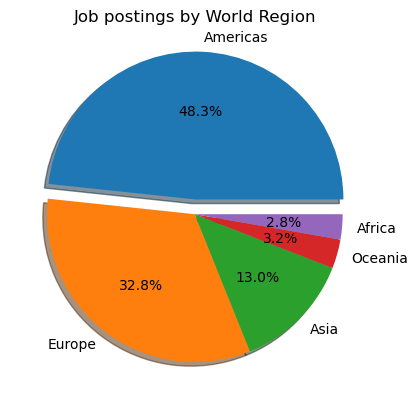

In [15]:
jobs_data_final_copy['region'].value_counts().plot(kind='pie',explode=(.1, 0, 0, 0,0),shadow=True,autopct='%1.1f%%',ylabel="",title="Job postings by World Region")
jobs_data_final_copy.head()

## Information Retrieval

In [16]:
# Initialize docker container
!powershell -command "docker compose down"
!powershell -command "docker compose up -d"
!powershell -command "docker cp web.xml pri23-24-solr-1:/opt/solr-9.3.0/server/solr-webapp/webapp/WEB-INF/web.xml"

 Container pri23-24-solr-1  Stopping
 Container pri23-24-solr-1  Stopped
 Container pri23-24-solr-1  Removing
 Container pri23-24-solr-1  Removed
 Network pri23-24_default  Removing
 Network pri23-24_default  Removed
 Network pri23-24_default  Creating
 Network pri23-24_default  Created
 Container pri23-24-solr-1  Creating
 Container pri23-24-solr-1  Created
 Container pri23-24-solr-1  Starting
 Container pri23-24-solr-1  Started


In [17]:
# Wait until solr is ready
import requests
import time

while True:
    try:
        response = requests.get('http://localhost:8983/solr')
        if response.status_code == 200:
            print('Solr is ready.')
            break
    except requests.exceptions.RequestException as e:
        print('Solr is not ready yet, waiting...')
        time.sleep(2)  # wait for 10 seconds before trying again

Solr is not ready yet, waiting...
Solr is ready.


### Schema

In [18]:
schema_path = 'solr/jobs_schema.json'

with open(schema_path, 'rb') as f:
    schema_data = f.read()

headers = {'Content-type': 'application/json'}

r = requests.post('http://localhost:8983/solr/jobs/schema', data=schema_data, headers=headers)

if r.status_code == 200:
    print('Schema updated successfully')
else:
    print('Error updating schema')
    print(r.text)

Schema updated successfully


### Insert data

In [19]:
def convert_salary(row):
    if row['pay_period'] == 'YEARLY':
        return row['salary']
    elif row['pay_period'] == 'MONTHLY':
        return row['salary'] * 12
    elif row['pay_period'] == 'HOURLY':
        return row['salary'] * 1810
    else:
        return None

all_data = pd.merge(jobs_data, jobs_location_data, on='location_id', how='left')
all_data = pd.merge(all_data, company_data, on='company_id', how='left')
all_data.drop(columns=['location_id','company_id'],inplace=True)
all_data['yearly_salary'] = all_data.apply(lambda row: convert_salary(row), axis=1)
all_data.insert(0, 'id', range(0, 0 + len(all_data)))
all_data_doc = all_data.to_dict(orient='records')

In [20]:
import pysolr

solr = pysolr.Solr('http://localhost:8983/solr/jobs', timeout=10)

def add_jobs(documents):
    chunk_size = 2000  # adjust this value based on your needs

    # Split data into chunks and add them to Solr
    for i in range(0, len(documents), chunk_size):
        chunk = documents[i:i+chunk_size]
        solr.add(chunk)
        solr.commit()


add_jobs(all_data_doc)

In [21]:
from sentence_transformers import SentenceTransformer

def update_dense_index():
    try:
        model_name = 'bert-base-nli-mean-tokens'
        model = SentenceTransformer(model_name)
    except Exception as e:
        print('Error loading model')
        print(e)
        return
    
    solr_response = solr.search('*:*', rows=1000000)

    for item in solr_response:
        title = item['title']
        id = item['id']
        
        embedding = model.encode([title])
        solr.add({'id': id, 'bert_vector': {'set':[float(x) for x in embedding[0]]}})

    solr.commit()

update_dense_index()


### Query 1 - Administration jobs in education establishments

In [22]:
# Simple query
sq1 = solr.search(q='(company:university OR company:school OR company:college) AND (title:administration OR description:administration)', 
                sort='score desc', rows='10')

for hit in sq1:
    print(hit)

{'id': '1040', 'title': 'Wellcome Trust PhD Programmes Administrator', 'work-type': 'Full-time', 'salary': 'NaN', 'description': 'Job description\n\nKing’s College London hosts an extensive portfolio of Doctoral Training Partnerships and Centres (https://www.kcl.ac.uk/study-legacy/doctoral-studies/doctoral-training-partnerships) including three Wellcome Trust funded ‘Four-year PhD Studentships in Science’ Programmes:\n• Cell Therapies and Regenerative Medicine (Cohorts 2016 – 2019)\n• Advanced Therapies for Regenerative Medicine (Cohorts 2020 – 2024)\n• Neuro-Immune Interactions in Health and Disease (Cohorts 2020 – 2024)\n\nwhich will fund the graduate studies of more than 80 PhD Programme students during the lifetime of the awards. The Programmes also support the management of the Wellcome Trust Biomedical Vacation Scholarships (BVS) programme available to promising undergraduate students from across the UK looking to gain research experience.\n\nWe are looking for an enthusiastic, o

In [23]:
# Boosting query
bq1 = solr.search(q='(company:university OR company:school OR company:college) AND (title:administration^4 OR description:administration)', 
                sort='score desc', rows='10')
for hit in bq1:
    print(hit)

{'id': '5', 'title': 'Graduate Program Administrator', 'work-type': 'Full-time', 'salary': 69342.0, 'pay_period': 'YEARLY', 'city': ['Edmonton'], 'country': 'United States of America', 'region': 'Americas', 'company': ['University of Alberta'], 'yearly_salary': [69342.0], 'bert_vector': [-0.19966106, -0.06723608, 1.665179, 0.3774929, 0.51394296, 0.59130657, -0.24499197, 0.12737282, -0.1281039, -0.38708916, -0.072637275, 0.07100631, 1.1443306, 0.9514982, -0.35440093, -0.5424898, -0.59988356, -0.31784192, 0.10729514, -1.4600627, -0.47026652, 0.44541898, 0.35434303, 0.117281176, -1.1088873, -0.22822532, -0.05729928, -1.1156738, -0.2380481, 0.017161056, -0.68488723, -1.2533764, 0.789604, 0.578962, 0.34820956, 0.6537062, -0.4892365, 0.8052654, 0.260914, -0.2088891, -0.043018647, -0.6875879, 0.65738356, 0.6443263, -1.5168632, -0.5257402, 0.16435805, 0.3298043, 0.038284153, -1.0799816, -0.45218435, 0.23519194, 0.48800105, 0.73815423, -0.41203672, 0.5149835, 0.7587942, -0.8778347, 0.18201374, 

### Query 2 - Jobs as part of a team in medical field

In [24]:
# Simple query
sq2 = solr.search(q='(title:medical OR description:medical) AND (title:team OR description:team)', 
                sort='score desc', rows='10')

for hit in sq2:
    print(hit)

{'id': '1643', 'title': 'Medical Secretary', 'work-type': 'Full-time', 'salary': 'NaN', 'description': "Would you like to do a job that makes a difference every day, using your skills and experience, to support the teams that help with their mental health in Cornwall and the Isles of Scilly?\n\nWould you like to live in Cornwall or are you lucky enough to already live here? Cornwall is a county of outstanding natural beauty with its endless rugged coastlines, beautiful countryside, and unbeatable beaches. Attracting millions of visitors each year, this could be your chance to move here permanently and make a difference to the children and young people in our community\n\nAn opportunity has arisen for an enthusiastic, flexible and well-motivated Medical Secretary to join our CAMHS Team. This post will be based in our Penzance office and we currently adopt a hybrid way of working where there is an opportunity on some days of the week to work from home.\n...\n\nFor more information about 

In [25]:
# Boosting query
bq2 = solr.search(q='(title:medical^10 OR description:medical^5) AND (title:team OR description:team)', 
                sort='score desc', rows='10')

for hit in bq2:
    print(hit)

{'id': '990', 'title': 'Medical Assistant Apprenticeship – Medical Assistant Instructor', 'work-type': 'Full-time', 'salary': 70040.0, 'pay_period': 'YEARLY', 'city': ['Renton'], 'country': 'United States of America', 'region': 'Americas', 'company': ['SEIU 1199NW Training Fund'], 'yearly_salary': [70040.0], 'bert_vector': [0.45520326, 0.36232242, 1.4050324, -0.022379866, 0.33026728, -0.30585966, 0.341885, -0.8375201, 0.325952, -0.48896852, 0.4824252, 0.33934334, 1.385984, 0.97565377, -0.22016533, -0.027978294, -0.6542113, -0.37243173, 0.061913982, -0.6770694, -0.46340418, -0.52162194, 0.83528465, 0.52563405, -0.60801905, 1.0091568, -0.28544632, -0.35870612, -0.48708236, -0.03377445, -0.0638738, -1.1654961, 0.9109493, -0.344167, 0.33538353, 0.22662218, 0.14624196, 1.2353433, 0.17618348, -0.7673524, -1.4365458, -0.080492996, 0.22812676, 0.47841936, -0.81989914, -0.6461387, -0.38528174, 0.26289913, 0.22612055, -0.32082927, -0.33850962, -0.573509, 1.2183897, 0.41618875, -0.70317525, -0.24

### Query 3 - Data engineering jobs with 3 year experience required

In [26]:
# Simple query
sq3 = solr.search(q='(title:data description:data title:engineering description:engineering) AND description:"3 year experience"', 
                sort='score desc', rows='10')

for hit in sq3:
    print(hit)

{'id': '482', 'title': 'Senior Data Scientist', 'work-type': 'Full-time', 'salary': 80000.0, 'pay_period': 'YEARLY', 'city': ['Waterloo'], 'country': 'United States of America', 'region': 'Americas', 'company': ['Sun Life'], 'yearly_salary': [80000.0], 'bert_vector': [-0.71981645, 0.057014547, 1.3698275, 0.48913598, -0.46340656, -0.35128015, -0.7222418, -0.024778992, 0.28639406, 0.9301605, -0.33766064, 0.26805633, 0.76605237, 0.68404615, -0.23327968, 0.18556277, -0.5870486, -0.5251314, 0.85259926, -0.6938965, -0.29588404, 0.29727507, 0.12351618, -0.48516855, -0.22965124, -0.15351084, -0.5027217, -1.7544333, -0.3229176, 0.45723048, -0.30269656, -0.96017027, 0.05387377, 0.5560171, 0.5365911, 0.17863892, 0.33084074, 0.519845, 0.24393408, -0.08588738, 1.4935948, -0.35211617, 0.7123627, 0.67803764, -0.61905324, -0.70516455, -0.393982, 0.9975441, 0.49546257, -1.1663654, -1.8906434, 0.37604788, 0.024482151, 0.63399947, -0.83960515, 0.6651675, 0.7051894, -0.586959, 0.22959153, 1.0597152, 0.137

In [27]:
# Boosting query
bq3 = solr.search(q=' (title:data^5 description:data title:engineering^5 description:engineering) AND description:"3 year experience"~10', 
                sort='score desc', rows='10')

for hit in bq3:
    print(hit)

{'id': '493', 'title': 'Senior Data Analyst', 'work-type': 'Contract', 'salary': 741000.0, 'pay_period': 'YEARLY', 'city': ['Waterloo'], 'country': 'United States of America', 'region': 'Americas', 'company': ['Sun Life'], 'yearly_salary': [741000.0], 'bert_vector': [-0.7425728, 0.07892269, 1.334484, 0.3903252, -0.3978118, -0.24821377, -0.81018734, -0.05348555, 0.14689536, 0.72712743, -0.41131005, 0.47000974, 0.8152138, 0.49463528, -0.17053868, -0.0519464, -0.50065583, -0.414116, 0.89721954, -0.8693224, -0.3752721, 0.42786485, 0.41569123, -0.5003029, -0.38546553, -0.3418917, -0.27483243, -1.6003529, -0.24261484, 0.3745595, -0.30486503, -0.94194585, 0.09381403, 0.5806614, 0.7211558, 0.17483667, 0.47346672, 0.5490917, 0.11710398, -0.08268257, 1.2453444, 0.057890765, 0.7493479, 0.6448318, -0.578956, -0.74359447, -0.4006564, 0.82657874, 0.42052573, -1.1615586, -1.5572687, 0.5420087, 0.14548883, 0.6107238, -0.5988778, 0.85507566, 0.5095178, -0.56456137, 0.057229377, 1.0380743, -0.057394337,

### Query 4 - Non-contract jobs, paid by hour, not computation related

In [28]:
# Simple query
sq4 = solr.search(q='(-work-type:Contract AND pay_period:HOURLY AND -title:computation AND -description:computation)', 
                sort='score desc', rows='10')

for hit in sq4:
    print(hit)

{'id': '2375', 'title': 'After School Academic Tutor', 'work-type': 'Full-time', 'salary': 33.59, 'description': 'Sterling House Community Center, Inc. Title: After-School Academic Tutor Reports to: Director of Youth Development Position Overview: Sterling House Community Center, Inc. (SHCC) is seeking dynamic certified teachers to provide individualized and small-group instruction to students. This individual is passionate about working with students, familiar with best practices in curriculum and instruction, and has a strong background in intervention services. Responsibilities Include:● Collaborates with families, teachers, and relevant team members to create and implement individualized learning plans based on student needs.● Determines research-based interventions and progress monitoring tools.● Plans for lessons to be taught in small or individual groups.● Provides individualized instruction as needed in math and English Language Arts to assigned students.● Analyzes ongoing prog

In [29]:
# Boosting query
sq4 = solr.search(q='(-work-type:Contract AND pay_period:HOURLY^5 AND -title:computation AND -description:computation)', 
                sort='score desc', rows='10')

for hit in sq4:
    print(hit)

{'id': '2375', 'title': 'After School Academic Tutor', 'work-type': 'Full-time', 'salary': 33.59, 'description': 'Sterling House Community Center, Inc. Title: After-School Academic Tutor Reports to: Director of Youth Development Position Overview: Sterling House Community Center, Inc. (SHCC) is seeking dynamic certified teachers to provide individualized and small-group instruction to students. This individual is passionate about working with students, familiar with best practices in curriculum and instruction, and has a strong background in intervention services. Responsibilities Include:● Collaborates with families, teachers, and relevant team members to create and implement individualized learning plans based on student needs.● Determines research-based interventions and progress monitoring tools.● Plans for lessons to be taught in small or individual groups.● Provides individualized instruction as needed in math and English Language Arts to assigned students.● Analyzes ongoing prog

In [31]:
try:
    model_name = 'bert-base-nli-mean-tokens'
    model = SentenceTransformer(model_name)
except Exception as e:
    print('Error loading model')
    print(e)

def semantic_search(query, start=0, rows=30):
    print(f"************ Semantic search for {query}")
    embedding = model.encode([query])
    solr_response=solr.search(
        q="{!knn f=bert_vector topK=10}"+str([float(w) for w in embedding[0]]),
        start=start,
        rows = rows
    )
    
    return solr_response

def keyword_search(query, start=0, rows=30):
    print(f"performing keyword search for {query}")
    solr_response=solr.search(
        q=query,
        start=start,
        rows=rows,
        qf='title^5 description^3',
        pf='title^5',
        defType='edismax',
        ps='7',
        wt='json'
    )
    
    
    return solr_response

def hybrid_search(query, start=0, rows=30, filter_queries=[], user_signal=''):
    print(f"\n************ Hybrid search for {query}" )                  
    embedding = model.encode([query])

    solr_response = solr.search(
        q="{!knn f=bert_vector topK=10}"+str([float(w) for w in embedding[0]]),
        **{
            'start': start,
            'rows': rows,
            'fq': filter_queries,
            'rq': '{!rerank reRankQuery=$rqq reRankDocs=50 reRankWeight=3}',
            'rqq': "{!edismax qf='title^5 description^2'}"+user_signal,
            'stats': True,
            'stats.field': 'yearly_salary',
        }
    )

    return solr_response

In [32]:
from flask import Flask, jsonify, request
app = Flask(__name__)

@app.route('/sematinc_search', methods=['GET'])
def sematinc_search():
    query = request.args.get('query', '')
    start = request.args.get('start', 0)
    rows = request.args.get('rows', 30)
    solr_response = semantic_search(query, start, rows)
    return jsonify(solr_response)

@app.route('/keyword_search', methods=['GET'])
def keyword_search():
    query = request.args.get('query', '')
    start = request.args.get('start', 0)
    rows = request.args.get('rows', 30)
    solr_response = keyword_search(query, start, rows)
    return jsonify(solr_response)

@app.route('/hybrid_search', methods=['GET'])
def hybrid_search():
    query = request.args.get('query', '')
    start = request.args.get('start', 0)
    rows = request.args.get('rows', 30)
    filter_queries = request.args.get('filter_queries', [])
    user_signal = request.args.get('user_signal', '')
    solr_response = hybrid_search(query, start, rows, filter_queries, user_signal)
    return jsonify(solr_response)

app.run(host='localhost', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://localhost:5000
Press CTRL+C to quit
127.0.0.1 - - [14/Dec/2023 13:54:49] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [14/Dec/2023 13:54:49] "GET /favicon.ico HTTP/1.1" 404 -
[2023-12-14 14:06:44,150] ERROR in app: Exception on /hybrid_search [GET]
Traceback (most recent call last):
  File "c:\Users\Henrique\anaconda3\Lib\site-packages\flask\app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Henrique\anaconda3\Lib\site-packages\flask\app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Henrique\anaconda3\Lib\site-packages\flask\app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Henrique\anaconda3\Lib\site-packages\flask\app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_a